# 프로젝트 개요

## 프로젝트 목표
- 웹 스크래핑을 이용해서 웹페이지 데이터 추출

## 문제 정의

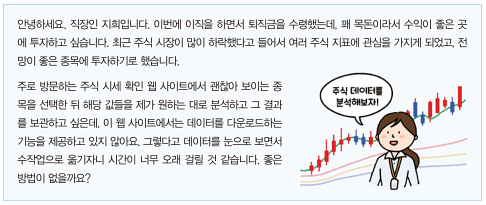


# 웹 스크래핑(Web Scraping)
- 삼성전자 page
- Ctrl + Shift + I
- https://finance.naver.com/item/sise_day.naver?code=005930&page=2


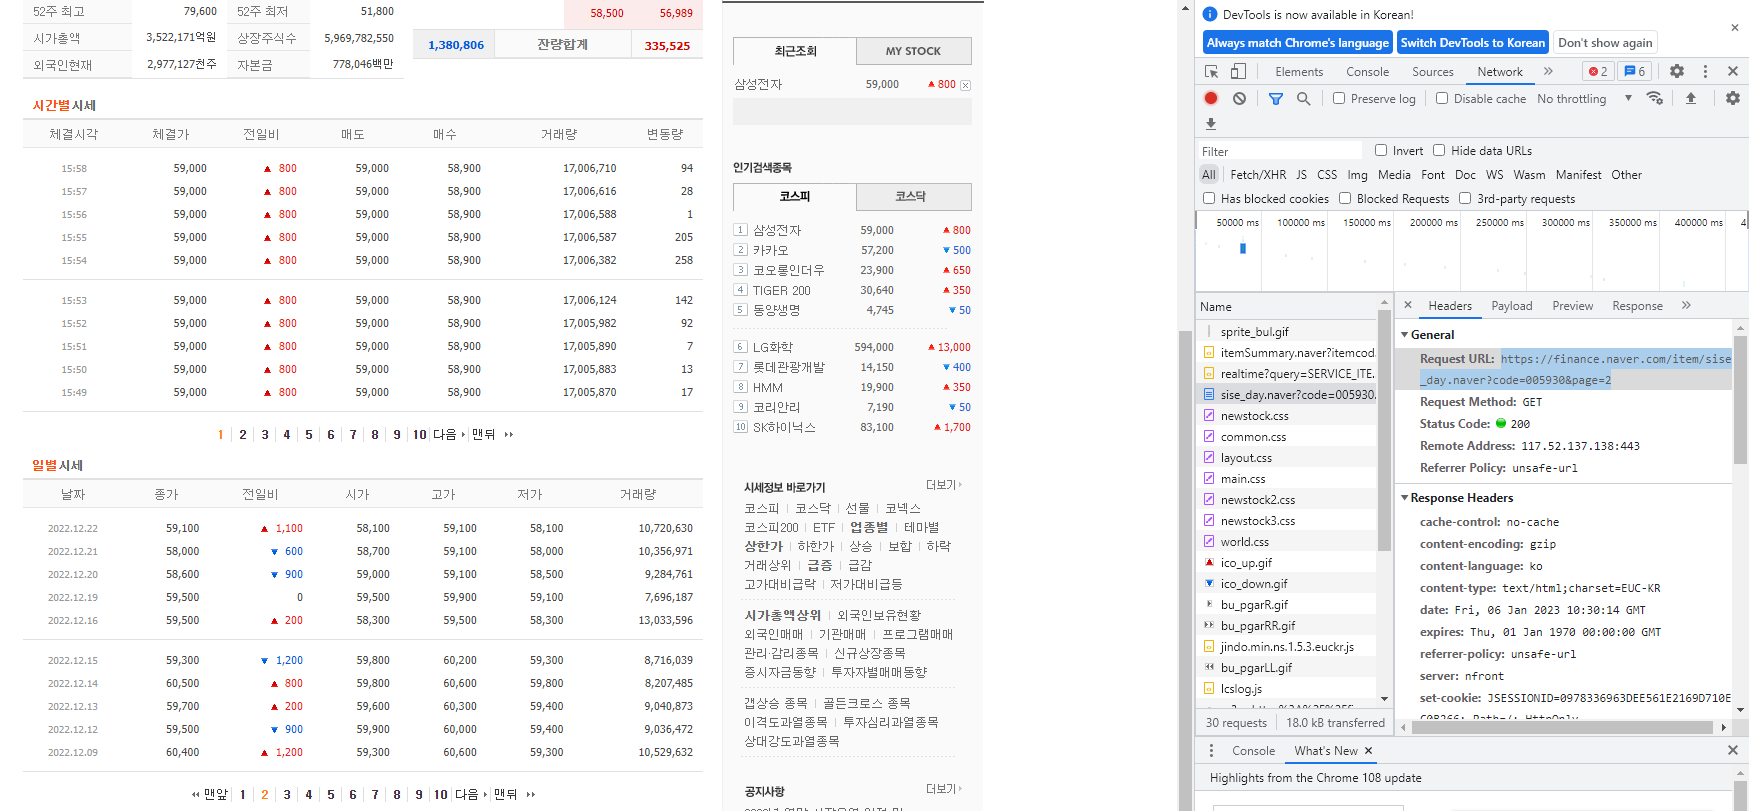

# 데이터 수집 및 가공


## Web Scraping 가능 유무 확인

In [1]:
# 웹 브라우저 없이 웹 정보 확인

# web scraping 가능 유무 확인을 위한 모듈 탑재
import requests

# web scraping 대상 주소 저장
url = 'https://finance.naver.com/item/sise_day.naver?code=005930&page=2'

# HTTP 요청을 대상 주소로 보내고, HTTP 응답 받아서 저장하기
page = requests.get(url)

# 응답 내용 확인하기
print(page.text)


<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<meta http-equiv="Content-Type" content="text/html; charset=euc-kr">
<title>네이버 :: 세상의 모든 지식, 네이버</title>

<style type="text/css">
.error_content * {margin:0;padding:0;}
.error_content img{border:none;}
.error_content em {font-style:normal;}
.error_content {width:410px; margin:80px auto 0; padding:57px 0 0 0; font-size:12px; font-family:"나눔고딕", "NanumGothic", "돋움", Dotum, AppleGothic, Sans-serif; text-align:left; line-height:14px; background:url(https://ssl.pstatic.net/static/common/error/090610/bg_thumb.gif) no-repeat center top; white-space:nowrap;}
.error_content p{margin:0;}
.error_content .error_desc {margin-bottom:21px; overflow:hidden; text-align:center;}
.error_content .error_desc2 {margin-bottom:11px; padding-bottom:7px; color:#888; line-height:18px; border-bottom:1px solid #eee;}
.error_content .error_desc3 {clear:both; color:#888;}
.error_content .error_desc3

In [2]:
# 헤더 정보 설정
my_headers = {'user-agent':'Mozilla/5.0'}

# 요청 헤더 설정하여 HTTP응답 받아오기
page = requests.get(url, headers=my_headers)

# 응답 내용 확인하기
print(page.text)


<html lang="ko">
<head>
<meta http-equiv="Content-Type" content="text/html; charset=euc-kr">
<title>네이버 증권</title>

<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230519195543/css/newstock.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230519195543/css/common.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230519195543/css/layout.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230519195543/css/main.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230519195543/css/newstock2.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230519195543/css/newstock3.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230519195543/css/world.css">
</head>
<body>
<script language="JavaS

## 웹 데이터 수집하기

- Method : read_html()

In [3]:
# Pandas Lib. 탑재
import pandas as pd

# HTML 페이지에서 테이블 추출
pages = pd.read_html(page.text)

# 추출한 데이터 타입 확인
type(pages)

list

## 필요한 테이블 데이터 고르기

In [4]:
# 페이지 개수 확인하기
len(pages)

2

In [5]:
pages[0]

,날짜,종가,전일비,시가,고가,저가,거래량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023.05.15,64500.0,400.0,64100.0,64600.0,63900.0,8172021.0
2,2023.05.12,64100.0,100.0,63700.0,64600.0,63600.0,8693913.0
3,2023.05.11,64200.0,400.0,64700.0,65100.0,64200.0,11648905.0
4,2023.05.10,64600.0,700.0,65500.0,65500.0,64300.0,13057727.0
5,2023.05.09,65300.0,600.0,65800.0,65800.0,65100.0,9366861.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2023.05.08,65900.0,800.0,66300.0,66300.0,65400.0,9405365.0


In [6]:
pages[1]

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,맨앞,1,2,3,4,5,6,7,8,9,10,다음,맨뒤


## 페이징 처리가 되어 있는 데이터 수집하기


### 페이지 번호 증가용 반복문 작성

In [7]:
# 페이지 번호를 제외한 주소 작성
new_url = 'https://finance.naver.com/item/sise_day.naver?code=005930&page='

# 데이터 축척용 데이터프래임 생성
all_tables = pd.DataFrame()


In [8]:
# 페이지 번호 증가용 반복문
for page_number in range(1, 2):
  
  # 페이지 번호 추가한 주소 완성
  full_url = new_url + str(page_number)

  # 주소 확인
  print(f'{page_number} 번째 페이지 읽어오기({full_url})')

  # HTTP 요청 전송 후 응답 받아오기
  page = requests.get(full_url, headers=my_headers)

  # 테이블 추출
  table = pd.read_html(page.text)[0]

  # 수행할 내용 확인
  print(f'전체 {len(all_tables.index)} 줄에 {len(table.index)} 줄 추가')

  # 데이터 축적용 데이터 프레임에 테이블 추가
  all_tables = pd.concat([all_tables, table])



1 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&page=1)
전체 0 줄에 15 줄 추가


In [9]:
all_tables

,날짜,종가,전일비,시가,고가,저가,거래량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023.05.30,72300.0,2000.0,71300.0,72300.0,71200.0,25292152.0
2,2023.05.26,70300.0,1500.0,69800.0,70400.0,69500.0,19549511.0
3,2023.05.25,68800.0,300.0,69900.0,70000.0,68700.0,14231160.0
4,2023.05.24,68500.0,100.0,68100.0,68700.0,68000.0,8192896.0
5,2023.05.23,68400.0,100.0,68500.0,68700.0,68100.0,8561643.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2023.05.22,68500.0,100.0,68400.0,69000.0,68000.0,14470308.0


In [10]:
# 결손치 제거
all_tables.dropna(inplace=True)

# 데이터 확인 하기
all_tables

,날짜,종가,전일비,시가,고가,저가,거래량
1,2023.05.30,72300.0,2000.0,71300.0,72300.0,71200.0,25292152.0
2,2023.05.26,70300.0,1500.0,69800.0,70400.0,69500.0,19549511.0
3,2023.05.25,68800.0,300.0,69900.0,70000.0,68700.0,14231160.0
4,2023.05.24,68500.0,100.0,68100.0,68700.0,68000.0,8192896.0
5,2023.05.23,68400.0,100.0,68500.0,68700.0,68100.0,8561643.0
9,2023.05.22,68500.0,100.0,68400.0,69000.0,68000.0,14470308.0
10,2023.05.19,68400.0,2200.0,67800.0,68400.0,67500.0,20349345.0
11,2023.05.18,66200.0,1200.0,66000.0,66200.0,65700.0,14431704.0
12,2023.05.17,65000.0,400.0,65900.0,65900.0,64800.0,10745504.0
13,2023.05.16,65400.0,900.0,65800.0,65900.0,65300.0,12334657.0


### 10페이지 데이터 수집

In [11]:
# 페이지 번호 증가용 반복문
for page_number in range(1, 11):
  
  # 페이지 번호 추가한 주소 완성
  full_url = new_url + str(page_number)

  # 주소 확인
  print(f'{page_number} 번째 페이지 읽어오기({full_url})')

  # HTTP 요청 전송 후 응답 받아오기
  page = requests.get(full_url, headers=my_headers)

  # 테이블 추출
  table = pd.read_html(page.text)[0]

  # 수행할 내용 확인
  print(f'전체 {len(all_tables.index)} 줄에 {len(table.index)} 줄 추가')

  # 데이터 축적용 데이터 프레임에 테이블 추가
  all_tables = pd.concat([all_tables, table])

1 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&page=1)
전체 10 줄에 15 줄 추가
2 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&page=2)
전체 25 줄에 15 줄 추가
3 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&page=3)
전체 40 줄에 15 줄 추가
4 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&page=4)
전체 55 줄에 15 줄 추가
5 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&page=5)
전체 70 줄에 15 줄 추가
6 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&page=6)
전체 85 줄에 15 줄 추가
7 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&page=7)
전체 100 줄에 15 줄 추가
8 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&page=8)
전체 115 줄에 15 줄 추가
9 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&page=9)
전체 130 줄에 15 줄 추가
10 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&page=10)
전체 145 줄에 15 줄 추가


In [12]:
all_tables.dropna(inplace=True)

all_tables

,날짜,종가,전일비,시가,고가,저가,거래량
1,2023.05.30,72300.0,2000.0,71300.0,72300.0,71200.0,25292152.0
2,2023.05.26,70300.0,1500.0,69800.0,70400.0,69500.0,19549511.0
3,2023.05.25,68800.0,300.0,69900.0,70000.0,68700.0,14231160.0
4,2023.05.24,68500.0,100.0,68100.0,68700.0,68000.0,8192896.0
5,2023.05.23,68400.0,100.0,68500.0,68700.0,68100.0,8561643.0
...,...,...,...,...,...,...,...
9,2023.01.09,60700.0,1700.0,59700.0,60700.0,59600.0,18640107.0
10,2023.01.06,59000.0,800.0,58300.0,59400.0,57900.0,17334989.0
11,2023.01.05,58200.0,400.0,58200.0,58800.0,57600.0,15682826.0
12,2023.01.04,57800.0,2400.0,55700.0,58000.0,55600.0,20188071.0


# 데이터 시각화

## 상자 수염 그래프
- Box-and-whisker plot
- Method : boxplot()

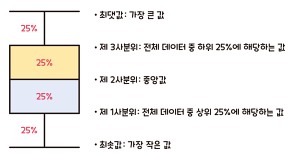

## 열 이름 영문으로 변경

- 날짜 : date
- 종가 : end_price
- 시가 : start_price
- 고가 : highest_price
- 저가 : lowest_price


In [13]:
# 열이름 영문으로 변경
all_tables.rename(columns = {'날짜' : 'date',
                             '종가' : 'end_price',
                             '시가' : 'start_price',
                             '고가' : 'highest_price', 
                             '저가' : 'lowest_price'}, inplace=True)

all_tables

,date,end_price,전일비,start_price,highest_price,lowest_price,거래량
1,2023.05.30,72300.0,2000.0,71300.0,72300.0,71200.0,25292152.0
2,2023.05.26,70300.0,1500.0,69800.0,70400.0,69500.0,19549511.0
3,2023.05.25,68800.0,300.0,69900.0,70000.0,68700.0,14231160.0
4,2023.05.24,68500.0,100.0,68100.0,68700.0,68000.0,8192896.0
5,2023.05.23,68400.0,100.0,68500.0,68700.0,68100.0,8561643.0
...,...,...,...,...,...,...,...
9,2023.01.09,60700.0,1700.0,59700.0,60700.0,59600.0,18640107.0
10,2023.01.06,59000.0,800.0,58300.0,59400.0,57900.0,17334989.0
11,2023.01.05,58200.0,400.0,58200.0,58800.0,57600.0,15682826.0
12,2023.01.04,57800.0,2400.0,55700.0,58000.0,55600.0,20188071.0


## 필요없는 열 제거

In [14]:
all_tables.drop(['전일비', '거래량'], axis=1, inplace=True)

all_tables

,date,end_price,start_price,highest_price,lowest_price
1,2023.05.30,72300.0,71300.0,72300.0,71200.0
2,2023.05.26,70300.0,69800.0,70400.0,69500.0
3,2023.05.25,68800.0,69900.0,70000.0,68700.0
4,2023.05.24,68500.0,68100.0,68700.0,68000.0
5,2023.05.23,68400.0,68500.0,68700.0,68100.0
...,...,...,...,...,...
9,2023.01.09,60700.0,59700.0,60700.0,59600.0
10,2023.01.06,59000.0,58300.0,59400.0,57900.0
11,2023.01.05,58200.0,58200.0,58800.0,57600.0
12,2023.01.04,57800.0,55700.0,58000.0,55600.0


## 중앙 값 추가

In [15]:
# 중앙값 열 추가
all_tables['midian_price'] = all_tables['highest_price'] - ((all_tables['highest_price'] - all_tables['lowest_price'])/2)

all_tables

,date,end_price,start_price,highest_price,lowest_price,midian_price
1,2023.05.30,72300.0,71300.0,72300.0,71200.0,71750.0
2,2023.05.26,70300.0,69800.0,70400.0,69500.0,69950.0
3,2023.05.25,68800.0,69900.0,70000.0,68700.0,69350.0
4,2023.05.24,68500.0,68100.0,68700.0,68000.0,68350.0
5,2023.05.23,68400.0,68500.0,68700.0,68100.0,68400.0
...,...,...,...,...,...,...
9,2023.01.09,60700.0,59700.0,60700.0,59600.0,60150.0
10,2023.01.06,59000.0,58300.0,59400.0,57900.0,58650.0
11,2023.01.05,58200.0,58200.0,58800.0,57600.0,58200.0
12,2023.01.04,57800.0,55700.0,58000.0,55600.0,56800.0


## 달 정보 추가하기

In [16]:
# 월 정보 열 추가
all_tables['month'] = all_tables['date'].str[0:7]

# 값 확인하기
all_tables

,date,end_price,start_price,highest_price,lowest_price,midian_price,month
1,2023.05.30,72300.0,71300.0,72300.0,71200.0,71750.0,2023.05
2,2023.05.26,70300.0,69800.0,70400.0,69500.0,69950.0,2023.05
3,2023.05.25,68800.0,69900.0,70000.0,68700.0,69350.0,2023.05
4,2023.05.24,68500.0,68100.0,68700.0,68000.0,68350.0,2023.05
5,2023.05.23,68400.0,68500.0,68700.0,68100.0,68400.0,2023.05
...,...,...,...,...,...,...,...
9,2023.01.09,60700.0,59700.0,60700.0,59600.0,60150.0,2023.01
10,2023.01.06,59000.0,58300.0,59400.0,57900.0,58650.0,2023.01
11,2023.01.05,58200.0,58200.0,58800.0,57600.0,58200.0,2023.01
12,2023.01.04,57800.0,55700.0,58000.0,55600.0,56800.0,2023.01


## 색인 변경 및 정렬


In [17]:
# 날짜를 색인으로 지정
all_tables.set_index('date', inplace=True)

# 날짜 오름차순으로 정렬
all_tables.sort_index(inplace=True)

all_tables

,end_price,start_price,highest_price,lowest_price,midian_price,month
date,,,,,,
2023.01.03,55400.0,55400.0,56000.0,54500.0,55250.0,2023.01
2023.01.04,57800.0,55700.0,58000.0,55600.0,56800.0,2023.01
2023.01.05,58200.0,58200.0,58800.0,57600.0,58200.0,2023.01
2023.01.06,59000.0,58300.0,59400.0,57900.0,58650.0,2023.01
2023.01.09,60700.0,59700.0,60700.0,59600.0,60150.0,2023.01
...,...,...,...,...,...,...
2023.05.25,68800.0,69900.0,70000.0,68700.0,69350.0,2023.05
2023.05.26,70300.0,69800.0,70400.0,69500.0,69950.0,2023.05
2023.05.26,70300.0,69800.0,70400.0,69500.0,69950.0,2023.05


# 그래프 그리기

<Axes: xlabel='date'>

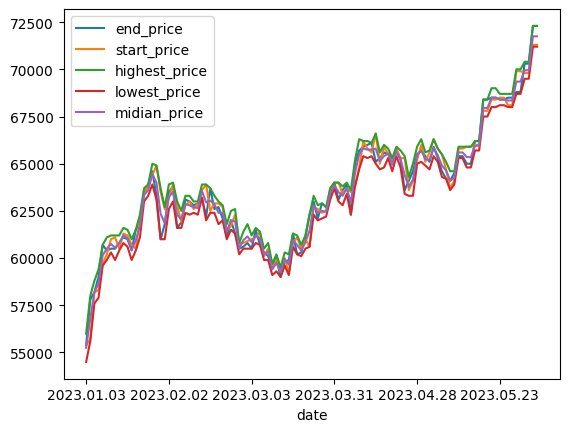

In [18]:
all_tables.plot.line()

<Axes: xlabel='date'>

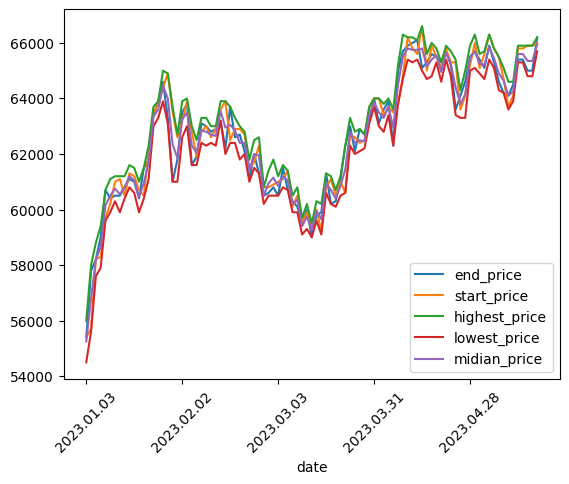

In [19]:
# 앞 15일 만 표시
all_tables[:-15].plot.line(rot=45)

# 상자 수염 그리기

<Axes: title={'center': 'midian_price'}, xlabel='[month]'>

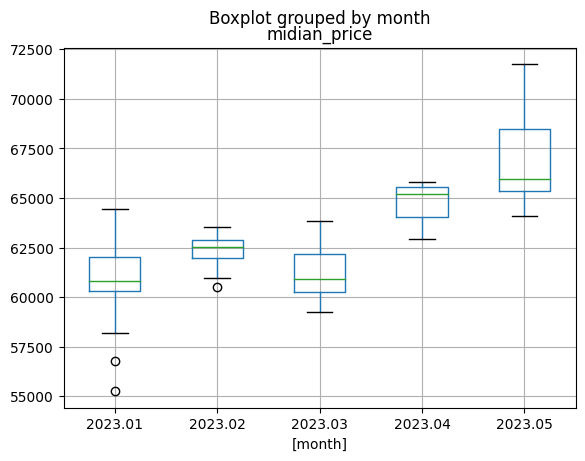

In [20]:
all_tables.boxplot(column=['midian_price'], by=['month'])

# 과제

### 1. 관심있는 회사 종목 분석 
- 최근 100일 분량의 데이터 확보 후 월 단위 중앙값을 기준으로 상자 수염 그래프 그리고 분석 결과 나열

In [49]:
# 종목선정 - 하이브
url_hibe="https://finance.naver.com/item/sise_day.naver?code=352820&page="
tables_hibe=pd.DataFrame()

In [50]:
# 페이지 번호 증가용 반복문
for page_number in range(1, 2):
  
  # 페이지 번호 추가한 주소 완성
  full_url = url_hibe + str(page_number)

  # 주소 확인
  print(f'{page_number} 번째 페이지 읽어오기({full_url})')

  # HTTP 요청 전송 후 응답 받아오기
  page = requests.get(full_url, headers=my_headers)

  # 테이블 추출
  table = pd.read_html(page.text)[0]

  # 수행할 내용 확인
  print(f'전체 {len(tables_hibe.index)} 줄에 {len(table.index)} 줄 추가')

  # 데이터 축적용 데이터 프레임에 테이블 추가
  tables_hibe = pd.concat([tables_hibe, table])

1 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=352820&page=1)
전체 0 줄에 15 줄 추가


In [51]:
tables_hibe

,날짜,종가,전일비,시가,고가,저가,거래량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023.05.30,276000.0,6000.0,270500.0,278500.0,265500.0,197635.0
2,2023.05.26,270000.0,3000.0,264500.0,272000.0,263000.0,192873.0
3,2023.05.25,267000.0,500.0,263000.0,272000.0,262500.0,183552.0
4,2023.05.24,267500.0,5500.0,278000.0,278500.0,263500.0,309525.0
5,2023.05.23,273000.0,4000.0,271000.0,273500.0,267500.0,236713.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2023.05.22,269000.0,12000.0,281000.0,281000.0,261000.0,483751.0


In [52]:
# 결손치 제거 후 확인
tables_hibe.dropna(inplace=True)
tables_hibe

,날짜,종가,전일비,시가,고가,저가,거래량
1,2023.05.30,276000.0,6000.0,270500.0,278500.0,265500.0,197635.0
2,2023.05.26,270000.0,3000.0,264500.0,272000.0,263000.0,192873.0
3,2023.05.25,267000.0,500.0,263000.0,272000.0,262500.0,183552.0
4,2023.05.24,267500.0,5500.0,278000.0,278500.0,263500.0,309525.0
5,2023.05.23,273000.0,4000.0,271000.0,273500.0,267500.0,236713.0
9,2023.05.22,269000.0,12000.0,281000.0,281000.0,261000.0,483751.0
10,2023.05.19,281000.0,5000.0,286000.0,288500.0,276500.0,205231.0
11,2023.05.18,286000.0,6000.0,292500.0,294000.0,284500.0,159742.0
12,2023.05.17,292000.0,8000.0,285000.0,295000.0,282500.0,372362.0
13,2023.05.16,284000.0,5500.0,279000.0,288000.0,276500.0,297601.0


### 10페이지 데이터 수집

In [53]:
# 페이지 번호 증가용 반복문
for page_number in range(1, 11):
  
  # 페이지 번호 추가한 주소 완성
  full_url = url_hibe + str(page_number)

  # 주소 확인
  print(f'{page_number} 번째 페이지 읽어오기({full_url})')

  # HTTP 요청 전송 후 응답 받아오기
  page = requests.get(full_url, headers=my_headers)

  # 테이블 추출
  table = pd.read_html(page.text)[0]

  # 수행할 내용 확인
  print(f'전체 {len(all_tables.index)} 줄에 {len(table.index)} 줄 추가')

  # 데이터 축적용 데이터 프레임에 테이블 추가
  tables_hibe = pd.concat([tables_hibe, table])

1 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=352820&page=1)
전체 110 줄에 15 줄 추가
2 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=352820&page=2)
전체 110 줄에 15 줄 추가
3 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=352820&page=3)
전체 110 줄에 15 줄 추가
4 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=352820&page=4)
전체 110 줄에 15 줄 추가
5 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=352820&page=5)
전체 110 줄에 15 줄 추가
6 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=352820&page=6)
전체 110 줄에 15 줄 추가
7 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=352820&page=7)
전체 110 줄에 15 줄 추가
8 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=352820&page=8)
전체 110 줄에 15 줄 추가
9 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=352820&page=9)
전체 110 줄에 15 줄 추가
10 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=352820&page=10)
전체 110 줄에 15 줄 추가


In [54]:
tables_hibe.dropna(inplace=True)
tables_hibe

,날짜,종가,전일비,시가,고가,저가,거래량
1,2023.05.30,276000.0,6000.0,270500.0,278500.0,265500.0,197635.0
2,2023.05.26,270000.0,3000.0,264500.0,272000.0,263000.0,192873.0
3,2023.05.25,267000.0,500.0,263000.0,272000.0,262500.0,183552.0
4,2023.05.24,267500.0,5500.0,278000.0,278500.0,263500.0,309525.0
5,2023.05.23,273000.0,4000.0,271000.0,273500.0,267500.0,236713.0
...,...,...,...,...,...,...,...
9,2023.01.09,173500.0,5500.0,170500.0,176500.0,170500.0,204808.0
10,2023.01.06,168000.0,4000.0,170000.0,172000.0,160500.0,509214.0
11,2023.01.05,172000.0,500.0,172000.0,177000.0,171000.0,173260.0
12,2023.01.04,171500.0,5000.0,176500.0,177000.0,169000.0,251334.0


# 데이터 시각화

## 상자 수염 그래프

## 열 이름 영문으로 변경

- 날짜 : date
- 종가 : end_price
- 시가 : start_price
- 고가 : highest_price
- 저가 : lowest_price


In [55]:
# 열이름 영문으로 변경
tables_hibe.rename(columns = {'날짜' : 'date',
                             '종가' : 'end_price',
                             '시가' : 'start_price',
                             '고가' : 'highest_price', 
                             '저가' : 'lowest_price'}, inplace=True)

tables_hibe

,date,end_price,전일비,start_price,highest_price,lowest_price,거래량
1,2023.05.30,276000.0,6000.0,270500.0,278500.0,265500.0,197635.0
2,2023.05.26,270000.0,3000.0,264500.0,272000.0,263000.0,192873.0
3,2023.05.25,267000.0,500.0,263000.0,272000.0,262500.0,183552.0
4,2023.05.24,267500.0,5500.0,278000.0,278500.0,263500.0,309525.0
5,2023.05.23,273000.0,4000.0,271000.0,273500.0,267500.0,236713.0
...,...,...,...,...,...,...,...
9,2023.01.09,173500.0,5500.0,170500.0,176500.0,170500.0,204808.0
10,2023.01.06,168000.0,4000.0,170000.0,172000.0,160500.0,509214.0
11,2023.01.05,172000.0,500.0,172000.0,177000.0,171000.0,173260.0
12,2023.01.04,171500.0,5000.0,176500.0,177000.0,169000.0,251334.0


## 필요없는 열 제거

In [56]:
tables_hibe.drop(['전일비', '거래량'], axis=1, inplace=True)

tables_hibe

,date,end_price,start_price,highest_price,lowest_price
1,2023.05.30,276000.0,270500.0,278500.0,265500.0
2,2023.05.26,270000.0,264500.0,272000.0,263000.0
3,2023.05.25,267000.0,263000.0,272000.0,262500.0
4,2023.05.24,267500.0,278000.0,278500.0,263500.0
5,2023.05.23,273000.0,271000.0,273500.0,267500.0
...,...,...,...,...,...
9,2023.01.09,173500.0,170500.0,176500.0,170500.0
10,2023.01.06,168000.0,170000.0,172000.0,160500.0
11,2023.01.05,172000.0,172000.0,177000.0,171000.0
12,2023.01.04,171500.0,176500.0,177000.0,169000.0


## 중앙 값 추가

In [57]:
# 중앙값 열 추가
tables_hibe['midian_price'] = tables_hibe['highest_price'] 
- ((tables_hibe['highest_price'] - tables_hibe['lowest_price'])/2)

tables_hibe

,date,end_price,start_price,highest_price,lowest_price,midian_price
1,2023.05.30,276000.0,270500.0,278500.0,265500.0,278500.0
2,2023.05.26,270000.0,264500.0,272000.0,263000.0,272000.0
3,2023.05.25,267000.0,263000.0,272000.0,262500.0,272000.0
4,2023.05.24,267500.0,278000.0,278500.0,263500.0,278500.0
5,2023.05.23,273000.0,271000.0,273500.0,267500.0,273500.0
...,...,...,...,...,...,...
9,2023.01.09,173500.0,170500.0,176500.0,170500.0,176500.0
10,2023.01.06,168000.0,170000.0,172000.0,160500.0,172000.0
11,2023.01.05,172000.0,172000.0,177000.0,171000.0,177000.0
12,2023.01.04,171500.0,176500.0,177000.0,169000.0,177000.0


## 달 정보 추가하기

In [58]:
# 월 정보 열 추가
tables_hibe['month'] = tables_hibe['date'].str[0:7]
# 값 확인하기
tables_hibe

,date,end_price,start_price,highest_price,lowest_price,midian_price,month
1,2023.05.30,276000.0,270500.0,278500.0,265500.0,278500.0,2023.05
2,2023.05.26,270000.0,264500.0,272000.0,263000.0,272000.0,2023.05
3,2023.05.25,267000.0,263000.0,272000.0,262500.0,272000.0,2023.05
4,2023.05.24,267500.0,278000.0,278500.0,263500.0,278500.0,2023.05
5,2023.05.23,273000.0,271000.0,273500.0,267500.0,273500.0,2023.05
...,...,...,...,...,...,...,...
9,2023.01.09,173500.0,170500.0,176500.0,170500.0,176500.0,2023.01
10,2023.01.06,168000.0,170000.0,172000.0,160500.0,172000.0,2023.01
11,2023.01.05,172000.0,172000.0,177000.0,171000.0,177000.0,2023.01
12,2023.01.04,171500.0,176500.0,177000.0,169000.0,177000.0,2023.01


## 색인 변경 및 정렬


In [59]:
# 날짜를 색인으로 지정
tables_hibe.set_index('date', inplace=True)

# 날짜 오름차순으로 정렬
tables_hibe.sort_index(inplace=True)

tables_hibe

,end_price,start_price,highest_price,lowest_price,midian_price,month
date,,,,,,
2023.01.03,176500.0,170000.0,182000.0,170000.0,182000.0,2023.01
2023.01.04,171500.0,176500.0,177000.0,169000.0,177000.0,2023.01
2023.01.05,172000.0,172000.0,177000.0,171000.0,177000.0,2023.01
2023.01.06,168000.0,170000.0,172000.0,160500.0,172000.0,2023.01
2023.01.09,173500.0,170500.0,176500.0,170500.0,176500.0,2023.01
...,...,...,...,...,...,...
2023.05.25,267000.0,263000.0,272000.0,262500.0,272000.0,2023.05
2023.05.26,270000.0,264500.0,272000.0,263000.0,272000.0,2023.05
2023.05.26,270000.0,264500.0,272000.0,263000.0,272000.0,2023.05


# 그래프 그리기

<Axes: xlabel='date'>

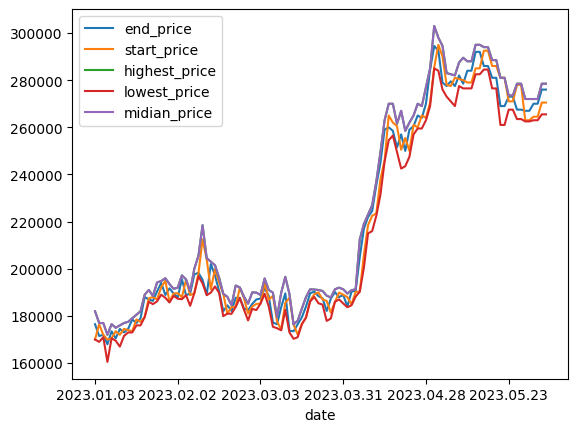

In [60]:
tables_hibe.plot.line()

<Axes: xlabel='date'>

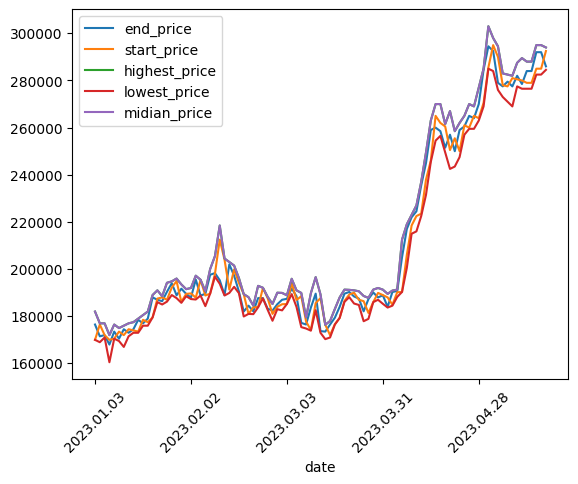

In [61]:
# 앞 15일 만 표시
tables_hibe[:-15].plot.line(rot=45)

# 상자 수염 그리기

<Axes: title={'center': 'midian_price'}, xlabel='[month]'>

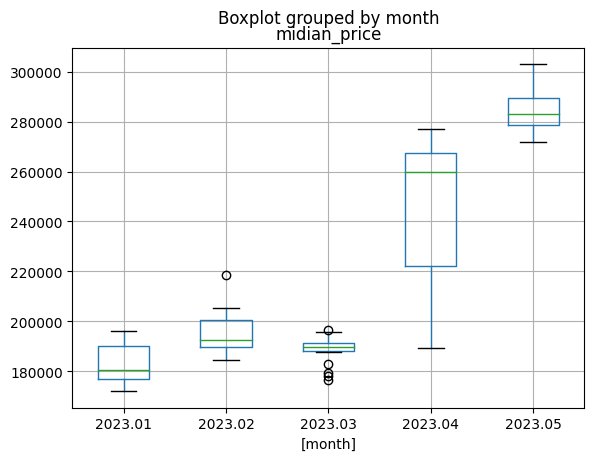

In [62]:
tables_hibe.boxplot(column=['midian_price'], by=['month'])

### 2. 
- 1번에서 분석한 결과의 데이터 범위를 1년으로 늘리고 분석 결과를 1번 결과와 비교해 각자 분석 결과 나열

## 1년치 데이터 수집
- 1년 전인 2022년 5월 30일 데이터가 있는 페이지 확인

![2022hibestock](2022hibestock.png)

In [66]:
tables_hibe_1year=pd.DataFrame()
# 페이지 번호 증가용 반복문
for page_number in range(1, 26):
  
  # 페이지 번호 추가한 주소 완성
  full_url = url_hibe + str(page_number)

  # 주소 확인
  print(f'{page_number} 번째 페이지 읽어오기({full_url})')

  # HTTP 요청 전송 후 응답 받아오기
  page = requests.get(full_url, headers=my_headers)

  # 테이블 추출
  table = pd.read_html(page.text)[0]

  # 수행할 내용 확인
  print(f'전체 {len(tables_hibe_1year.index)} 줄에 {len(table.index)} 줄 추가')

  # 데이터 축적용 데이터 프레임에 테이블 추가
  tables_hibe_1year = pd.concat([tables_hibe_1year, table])

1 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=352820&page=1)
전체 0 줄에 15 줄 추가
2 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=352820&page=2)
전체 15 줄에 15 줄 추가
3 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=352820&page=3)
전체 30 줄에 15 줄 추가
4 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=352820&page=4)
전체 45 줄에 15 줄 추가
5 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=352820&page=5)
전체 60 줄에 15 줄 추가
6 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=352820&page=6)
전체 75 줄에 15 줄 추가
7 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=352820&page=7)
전체 90 줄에 15 줄 추가
8 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=352820&page=8)
전체 105 줄에 15 줄 추가
9 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=352820&page=9)
전체 120 줄에 15 줄 추가
10 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=352820&page=10)
전체 135 줄에 15 줄 추가
11 번째 페이지 읽어오기(https://fin

In [68]:
tables_hibe_1year.dropna(inplace=True)
tables_hibe_1year

,날짜,종가,전일비,시가,고가,저가,거래량
1,2023.05.30,276000.0,6000.0,270500.0,278500.0,265500.0,197635.0
2,2023.05.26,270000.0,3000.0,264500.0,272000.0,263000.0,192873.0
3,2023.05.25,267000.0,500.0,263000.0,272000.0,262500.0,183552.0
4,2023.05.24,267500.0,5500.0,278000.0,278500.0,263500.0,309525.0
5,2023.05.23,273000.0,4000.0,271000.0,273500.0,267500.0,236713.0
...,...,...,...,...,...,...,...
9,2022.06.02,227000.0,4000.0,232000.0,232500.0,224500.0,137833.0
10,2022.05.31,231000.0,3000.0,228000.0,233000.0,225500.0,242955.0
11,2022.05.30,228000.0,9500.0,222500.0,228000.0,220500.0,214345.0
12,2022.05.27,218500.0,4000.0,219500.0,226500.0,215500.0,253460.0


## 데이터 시각화

## 열 이름 영문으로 변경

- 날짜 : date
- 종가 : end_price
- 시가 : start_price
- 고가 : highest_price
- 저가 : lowest_price


In [69]:
# 열이름 영문으로 변경
tables_hibe_1year.rename(columns = {'날짜' : 'date',
                             '종가' : 'end_price',
                             '시가' : 'start_price',
                             '고가' : 'highest_price', 
                             '저가' : 'lowest_price'}, inplace=True)

tables_hibe_1year

,date,end_price,전일비,start_price,highest_price,lowest_price,거래량
1,2023.05.30,276000.0,6000.0,270500.0,278500.0,265500.0,197635.0
2,2023.05.26,270000.0,3000.0,264500.0,272000.0,263000.0,192873.0
3,2023.05.25,267000.0,500.0,263000.0,272000.0,262500.0,183552.0
4,2023.05.24,267500.0,5500.0,278000.0,278500.0,263500.0,309525.0
5,2023.05.23,273000.0,4000.0,271000.0,273500.0,267500.0,236713.0
...,...,...,...,...,...,...,...
9,2022.06.02,227000.0,4000.0,232000.0,232500.0,224500.0,137833.0
10,2022.05.31,231000.0,3000.0,228000.0,233000.0,225500.0,242955.0
11,2022.05.30,228000.0,9500.0,222500.0,228000.0,220500.0,214345.0
12,2022.05.27,218500.0,4000.0,219500.0,226500.0,215500.0,253460.0


In [70]:
tables_hibe_1year.drop(['전일비', '거래량'], axis=1, inplace=True)

tables_hibe_1year

,date,end_price,start_price,highest_price,lowest_price
1,2023.05.30,276000.0,270500.0,278500.0,265500.0
2,2023.05.26,270000.0,264500.0,272000.0,263000.0
3,2023.05.25,267000.0,263000.0,272000.0,262500.0
4,2023.05.24,267500.0,278000.0,278500.0,263500.0
5,2023.05.23,273000.0,271000.0,273500.0,267500.0
...,...,...,...,...,...
9,2022.06.02,227000.0,232000.0,232500.0,224500.0
10,2022.05.31,231000.0,228000.0,233000.0,225500.0
11,2022.05.30,228000.0,222500.0,228000.0,220500.0
12,2022.05.27,218500.0,219500.0,226500.0,215500.0


## 중앙 값 추가

In [71]:
# 중앙값 열 추가
tables_hibe_1year['midian_price'] = tables_hibe_1year['highest_price'] 
- ((tables_hibe_1year['highest_price'] - tables_hibe_1year['lowest_price'])/2)

tables_hibe_1year

,date,end_price,start_price,highest_price,lowest_price,midian_price
1,2023.05.30,276000.0,270500.0,278500.0,265500.0,278500.0
2,2023.05.26,270000.0,264500.0,272000.0,263000.0,272000.0
3,2023.05.25,267000.0,263000.0,272000.0,262500.0,272000.0
4,2023.05.24,267500.0,278000.0,278500.0,263500.0,278500.0
5,2023.05.23,273000.0,271000.0,273500.0,267500.0,273500.0
...,...,...,...,...,...,...
9,2022.06.02,227000.0,232000.0,232500.0,224500.0,232500.0
10,2022.05.31,231000.0,228000.0,233000.0,225500.0,233000.0
11,2022.05.30,228000.0,222500.0,228000.0,220500.0,228000.0
12,2022.05.27,218500.0,219500.0,226500.0,215500.0,226500.0


## 달 정보 추가하기

In [72]:
# 월 정보 열 추가
tables_hibe_1year['month'] = tables_hibe_1year['date'].str[0:7]
# 값 확인하기
tables_hibe_1year

,date,end_price,start_price,highest_price,lowest_price,midian_price,month
1,2023.05.30,276000.0,270500.0,278500.0,265500.0,278500.0,2023.05
2,2023.05.26,270000.0,264500.0,272000.0,263000.0,272000.0,2023.05
3,2023.05.25,267000.0,263000.0,272000.0,262500.0,272000.0,2023.05
4,2023.05.24,267500.0,278000.0,278500.0,263500.0,278500.0,2023.05
5,2023.05.23,273000.0,271000.0,273500.0,267500.0,273500.0,2023.05
...,...,...,...,...,...,...,...
9,2022.06.02,227000.0,232000.0,232500.0,224500.0,232500.0,2022.06
10,2022.05.31,231000.0,228000.0,233000.0,225500.0,233000.0,2022.05
11,2022.05.30,228000.0,222500.0,228000.0,220500.0,228000.0,2022.05
12,2022.05.27,218500.0,219500.0,226500.0,215500.0,226500.0,2022.05


## 색인 변경 및 정렬


In [73]:
# 날짜를 색인으로 지정
tables_hibe_1year.set_index('date', inplace=True)

# 날짜 오름차순으로 정렬
tables_hibe_1year.sort_index(inplace=True)

tables_hibe_1year

,end_price,start_price,highest_price,lowest_price,midian_price,month
date,,,,,,
2022.05.26,214500.0,220000.0,221500.0,213500.0,221500.0,2022.05
2022.05.27,218500.0,219500.0,226500.0,215500.0,226500.0,2022.05
2022.05.30,228000.0,222500.0,228000.0,220500.0,228000.0,2022.05
2022.05.31,231000.0,228000.0,233000.0,225500.0,233000.0,2022.05
2022.06.02,227000.0,232000.0,232500.0,224500.0,232500.0,2022.06
...,...,...,...,...,...,...
2023.05.23,273000.0,271000.0,273500.0,267500.0,273500.0,2023.05
2023.05.24,267500.0,278000.0,278500.0,263500.0,278500.0,2023.05
2023.05.25,267000.0,263000.0,272000.0,262500.0,272000.0,2023.05


# 그래프 그리기

<Axes: xlabel='date'>

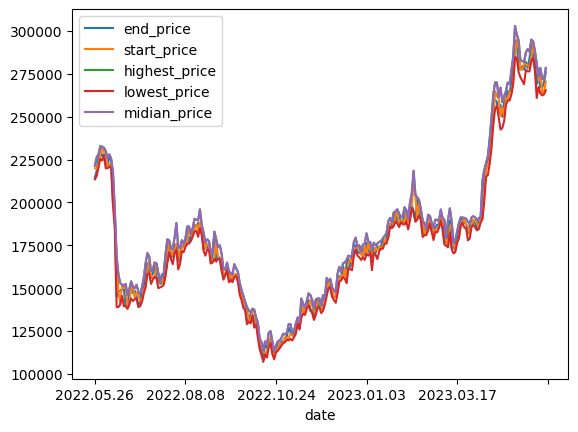

In [74]:
tables_hibe_1year.plot.line()

<Axes: xlabel='date'>

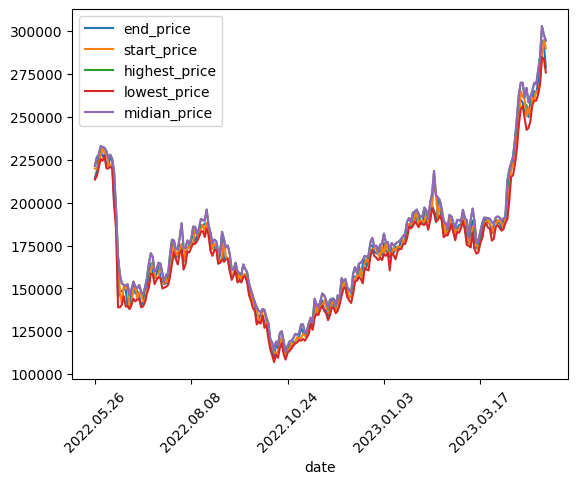

In [75]:
# 앞 15일 만 표시
tables_hibe_1year[:-15].plot.line(rot=45)

# 상자 수염 그리기

<Axes: title={'center': 'midian_price'}, xlabel='[month]'>

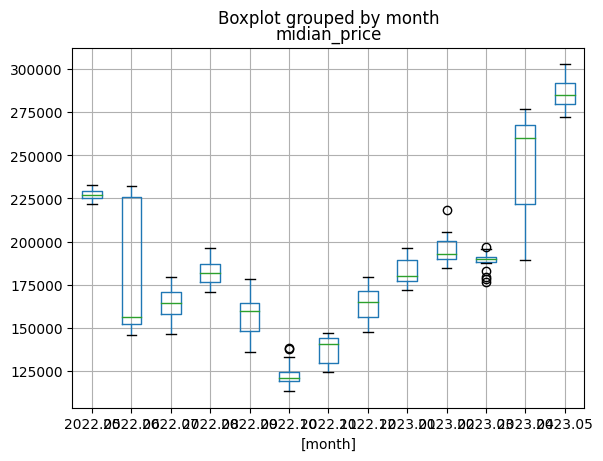

In [77]:
tables_hibe_1year.boxplot(column=['midian_price'], by=['month'])